# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:   Team 6  
Created by NAME (ID): Andrew Gong, Emily Lu (016261726), Ryuji Brioso (017227301), Ayman Rabia (017889495)  
Last updated: 10/12/2025  

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

In [ ]:
# Current Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "vgsales.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/global-video-game-sales",
  file_path
)

print(df.isna().sum(),'\n')
print(df.isnull().sum())
df.head()

/tmp/ipython-input-3119461027.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'global-video-game-sales' dataset.
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

# There are N/A values in 'Year' and 'Publisher' columns in the dataset
# Also, the 'Year' column has float data type instead of int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

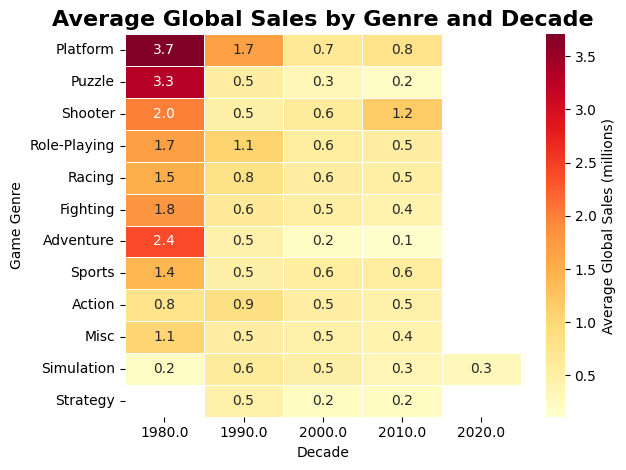

In [ ]:
# Question: How do game genres compare in terms of average global sales across different decades?
df['Decade'] = (df['Year'] // 10) * 10


heatmap_data = df.pivot_table(values='Global_Sales',
                                   index='Genre',
                                   columns='Decade',
                                   aggfunc='mean')

genre_totals = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.loc[genre_totals.sort_values(ascending=False).index]

sns.heatmap(heatmap_data,
            annot=True,
            fmt='.1f',
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label': 'Average Global Sales (millions)'})

plt.title('Average Global Sales by Genre and Decade', fontsize=16, fontweight='bold')
plt.xlabel('Decade')
plt.ylabel('Game Genre')
plt.tight_layout()
plt.show()

### Q3: Come up with a another unique question. This question must use map() or apply()

<Figure size 1400x800 with 0 Axes>

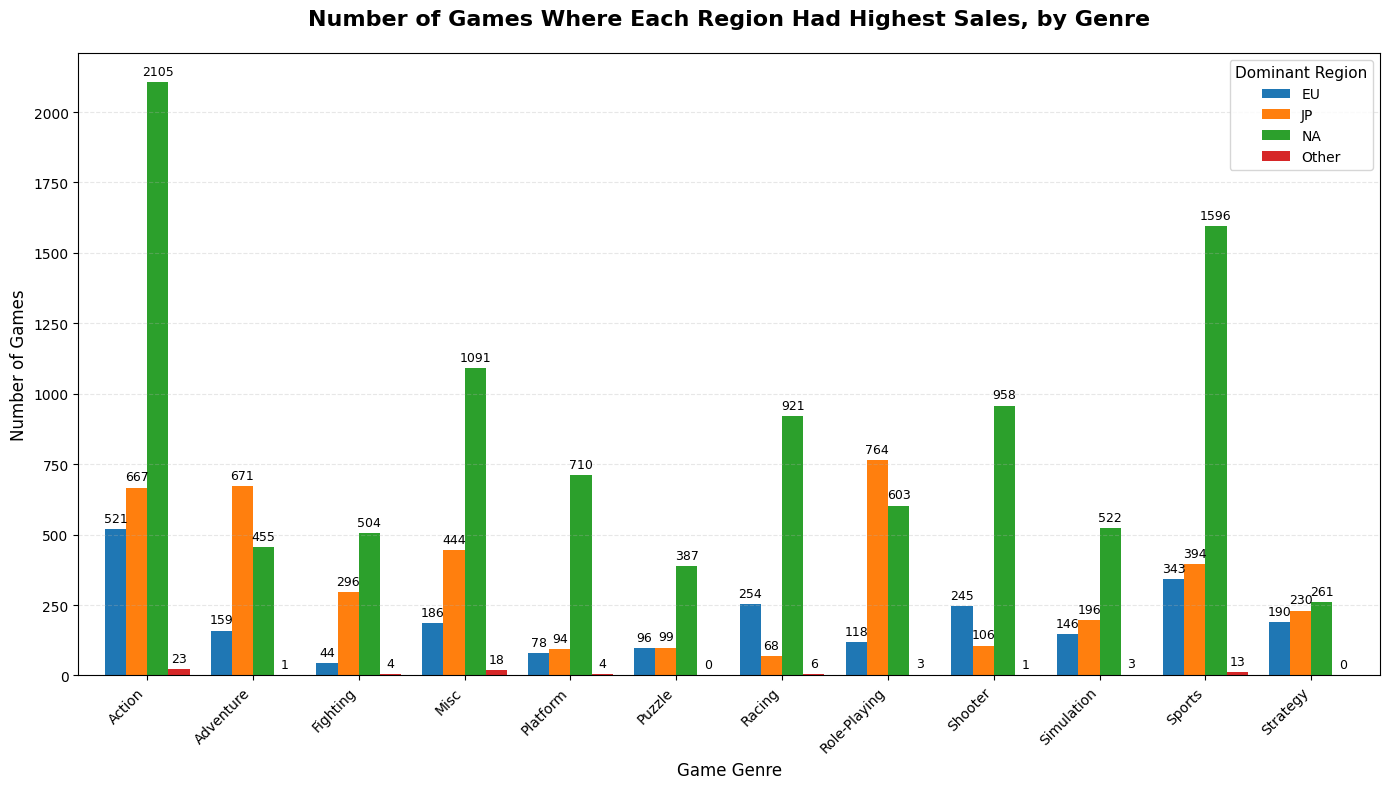

In [ ]:
# Question: How do regional sales preferences vary by genre?

# Function to determine dominant region for each game
def get_dominant_region(row):
    regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
    max_region = max(regions, key=lambda x: row[x])
    return max_region.replace('_Sales', '')

df['Dominant_Region'] = df.apply(get_dominant_region, axis=1)

plt.figure(figsize=(14, 8))

region_genre_counts = df.groupby(['Genre', 'Dominant_Region']).size().unstack(fill_value=0)

ax = region_genre_counts.plot(kind='bar',
                              figsize=(14, 8),
                              width=0.8,
                              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Number of Games Where Each Region Had Highest Sales, by Genre',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Game Genre', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.legend(title='Dominant Region', title_fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [ ]:
# Your code here . . .

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

An additional dataset that would help us is strengthen our data is the games publishers/devlopers (to understand which are dominant in each genre), console release date (to understand the cycle lifecycle of gaming console and how they affect sales), game review scores (to see if high scores correlate with higher sales), and some sort of economic context (to see if any economic factors played a role in the sales). We would most likely need to reshape our data for either more convient visualization or so that we could dispaly the data differently, such as the differing region sales.

In [ ]:
# Your code here . . .
'''
How to combine the dataset
df = pd.merge(df_sales, df_review, on='Name')

How to reshape data
df_pivot = df.pivot_table(
  values='Global_Sales,
  index='Year',
  columns='Genre',
)
'''